In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import importlib
# avoid font type 3, use TrueType font http://phyletica.org/matplotlib-fonts/
plt.rcParams['mathtext.fontset']= 'cm'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

## Load config file:
Because the config file located in a different foder, first we add the parent path into this working space.

In [3]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, "..")
cfg = importlib.import_module('config.turtlebot3_config_pytorch').config
print(cfg)

{'freq_val': 2, 'synthesized_test': False, 'inversed': False, 'early_stop_patience': 20, 'cross_validation': True, 'bidirection_decoder': True, 'look_ahead_only': False, 'learning_rate': 0.001, 'step_train': 1, 'synthesized_type': 'burst', 'feature_in': ['pose_pose_position_x', 'pose_pose_position_y'], 'scale': 'normalize', 'look_ahead': 0, 'num_layers': 1, 'hidden_size': 128, 'scenario': 'pentagon', 'synthesized_prob': 0.05, 'loss': 'mean_absolute_error', 'robot': 'turtlebot3', 'filter_only_attack': True, 'downsampling_subset': 4, 'batch_size_inference': 256, 'validation': True, 'synthesized_burst_width': 10, 'combine_encoder_states': 'concat', 'batch_size': 512, 'mode': 'normal', 'bidirection_encoder': True, 'optimizer': 'Adam', 'feature_out': ['pose_pose_position_x', 'pose_pose_position_y'], 'teacher_forcing_ratio': 0.75, 'use_gpu': True, 'droprate': 0.1, 'step_test': 5, 'look_back': 240, 'early_stopping': True}


In [4]:
cfg={
'feature_in': ['pose_pose_position_x', 
               'pose_pose_position_y', 
               'pose_pose_orientation_z', 
               'pose_pose_orientation_w', 
               'twist_twist_linear_x',
               'twist_twist_linear_y',
               'twist_twist_linear_z',
               'twist_twist_angular_x',
               'twist_twist_angular_y',
               'twist_twist_angular_z',
              ], 
'feature_out': ['pose_pose_position_x',
                'pose_pose_position_y', 
                'pose_pose_orientation_z', 
                'pose_pose_orientation_w',
               'twist_twist_linear_x',
               'twist_twist_linear_y',
               'twist_twist_linear_z',
               'twist_twist_angular_x',
               'twist_twist_angular_y',
               'twist_twist_angular_z',]
}

# Part 1: Load data and plot data

The dataset is collected in the simulated environment (`turtlebot3_myworld.launch`) in Gazebo environment with three files: 
* cmd_vel.csv: consists of control command sent from move_base controller.
* imd.csv: contains raw IMU data.
* odometry.csv: contains odometry of mobile robot.


In [5]:
data_dir = '../dataset/kobuki/normal_pentagon'
temp_odom = pd.read_csv('{}/odometry.csv'.format(data_dir))

In [7]:
temp_odom.head()

header_seq  h_stamp_secs  h_stamp_nsecs  pose_pose_position_x  \
0        1054    1610004613      810958736              0.546490   
1        1055    1610004613      833068610              0.543326   
2        1056    1610004613      891034407              0.536208   
3        1057    1610004613      913118396              0.533466   
4        1058    1610004613      971218515              0.524125   

   pose_pose_position_y  pose_pose_position_z  pose_pose_orientation_x  \
0              1.320369                   0.0                      0.0   
1              1.318689                   0.0                      0.0   
2              1.314907                   0.0                      0.0   
3              1.313432                   0.0                      0.0   
4              1.308383                   0.0                      0.0   

   pose_pose_orientation_y  pose_pose_orientation_z  pose_pose_orientation_w  \
0                      0.0                -0.970359                 0.241668   
1                      0.0                -0.970338                 0.241753   
2                      0.0                -0.969680                 0.244377   
3                      0.0                -0.969467                 0.245223   
4                      0.0                -0.967841                 0.251563   

   twist_twist_linear_x  twist_twist_linear_y  twist_twist_linear_z  \
0              0.167030                   0.0                   0.0   
1              0.179113                   0.0                   0.0   
2              0.134335                   0.0                   0.0   
3              0.155658                   0.0                   0.0   
4              0.176981                   0.0                   0.0   

   twist_twist_angular_x  twist_twist_angular_y  twist_twist_angular_z  
0                    0.0                    0.0               0.002618  
1                    0.0                    0.0               0.009250  
2                    0.0                    0.0               0.115017  
3                    0.0                    0.0               0.086743  
4                    0.0                    0.0               0.337023

In [6]:
temp_odom.head(60)

header_seq  h_stamp_secs  h_stamp_nsecs  pose_pose_position_x  \
0         1054    1610004613      810958736              0.546490   
1         1055    1610004613      833068610              0.543326   
2         1056    1610004613      891034407              0.536208   
3         1057    1610004613      913118396              0.533466   
4         1058    1610004613      971218515              0.524125   
5         1059    1610004613      994308802              0.521592   
6         1060    1610004614       54388187              0.512683   
7         1061    1610004614      114325437              0.503786   
8         1062    1610004614      174440759              0.495651   
9         1063    1610004614      234553373              0.487910   
10        1064    1610004614      292510473              0.479922   
11        1065    1610004614      314578473              0.477436   
12        1066    1610004614      374589004              0.469173   
13        1067    1610004614      432575636              0.461059   
14        1068    1610004614      454744625              0.458315   
15        1069    1610004614      512722194              0.449972   
16        1070    1610004614      535835086              0.447348   
17        1071    1610004614      595799420              0.439396   
18        1072    1610004614      655848909              0.431708   
19        1073    1610004614      713885123              0.424106   
20        1074    1610004614      736054008              0.421761   
21        1075    1610004614      796012769              0.414102   
22        1076    1610004614      854082056              0.406561   
23        1077    1610004614      876075890              0.404125   
24        1078    1610004614      934072781              0.396704   
25        1079    1610004614      956141250              0.394129   
26        1080    1610004615       14240329              0.387335   
27        1081    1610004615       37345410              0.385017   
28        1082    1610004615       97358599              0.377774   
29        1083    1610004615      157393975              0.370766   
30        1084    1610004615      217438570              0.363612   
31        1085    1610004615      277565404              0.356790   
32        1086    1610004615      337617238              0.349910   
33        1087    1610004615      395587673              0.343540   
34        1088    1610004615      417595205              0.341456   
35        1089    1610004615      475591578              0.335116   
36        1090    1610004615      497692131              0.333107   
37        1091    1610004615      555703815              0.326984   
38        1092    1610004615      578844260              0.324860   
39        1093    1610004615      638919168              0.318375   
40        1094    1610004615      698835378              0.312125   
41        1095    1610004615      759105232              0.305917   
42        1096    1610004615      818952536              0.299854   
43        1097    1610004615      877322397              0.293444   
44        1098    1610004615      899098576              0.291446   
45        1099    1610004615      959078171              0.284935   
46        1100    1610004616       17072200              0.279132   
47        1101    1610004616       39255305              0.277181   
48        1102    1610004616       97239335              0.271790   
49        1103    1610004616      120312125              0.269995   
50        1104    1610004616      180365315              0.264202   
51        1105    1610004616      240394234              0.258263   
52        1106    1610004616      298291286              0.252640   
53        1107    1610004616      320485536              0.250808   
54        1108    1610004616      380544247              0.245092   
55        1109    1610004616      438521507              0.239807   
56        1110    1610004616      460545185              0.238004   
57

Look at the above table, we can guess the collected frequency of odometry is 30 Hz.

In [8]:
temp_odom.describe()

header_seq  h_stamp_secs  h_stamp_nsecs  pose_pose_position_x  \
count  19704.000000  1.970400e+04   1.970400e+04          19704.000000   
mean   10905.500000  1.610005e+09   5.006428e+08              1.030003   
std     5688.199188  2.729768e+02   2.887897e+08              0.826024   
min     1054.000000  1.610005e+09   1.196840e+05             -0.293974   
25%     5979.750000  1.610005e+09   2.495230e+08              0.229377   
50%    10905.500000  1.610005e+09   4.997044e+08              1.095061   
75%    15831.250000  1.610005e+09   7.501721e+08              1.815387   
max    20757.000000  1.610006e+09   9.999736e+08              2.252305   

       pose_pose_position_y  pose_pose_position_z  pose_pose_orientation_x  \
count          19704.000000               19704.0                  19704.0   
mean              -0.133030                   0.0                      0.0   
std                0.997975                   0.0                      0.0   
min               -1.610098                   0.0                      0.0   
25%               -1.181645                   0.0                      0.0   
50%               -0.161630                   0.0                      0.0   
75%                0.845359                   0.0                      0.0   
max                1.349504                   0.0                      0.0   

       pose_pose_orientation_y  pose_pose_orientation_z  \
count                  19704.0             19704.000000   
mean                       0.0                -0.078640   
std                        0.0                 0.673615   
min                        0.0                -1.000000   
25%                        0.0                -0.827950   
50%                        0.0                -0.006370   
75%                        0.0                 0.533172   
max                        0.0                 1.000000   

       pose_pose_orientation_w  twist_twist_linear_x  twist_twist_linear_y  \
count             1.970400e+04          19704.000000               19704.0   
mean              6.721942e-01              0.118199                   0.0   
std               2.970547e-01              0.082721                   0.0   
min               2.832769e-16             -0.213230                   0.0   
25%               4.690670e-01              0.000000                   0.0   
50%               8.133039e-01              0.167741                   0.0   
75%               9.173556e-01              0.184800                   0.0   
max               1.000000e+00              0.245215                   0.0   

       twist_twist_linear_z  twist_twist_angular_x  twist_twist_angular_y  \
count               19704.0                19704.0                19704.0   
mean                    0.0                    0.0                    0.0   
std                     0.0                    0.0                    0.0   
min                     0.0                    0.0                    0.0   
25%                     0.0                    0.0                    0.0   
50%                     0.0                    0.0                    0.0   
75%                     0.0                    0.0                    0.0   
max                     0.0                    0.0                    0.0   

       twist_twist_angular_z  
count           19704.000000  
mean                0.089859  
std                 0.194594  
min                -0.741241  
25%                 0.000000  
50%                 0.022777  
75%                 0.139277  
max                 1.019272

## Plot input and output feature data

<AxesSubplot:>

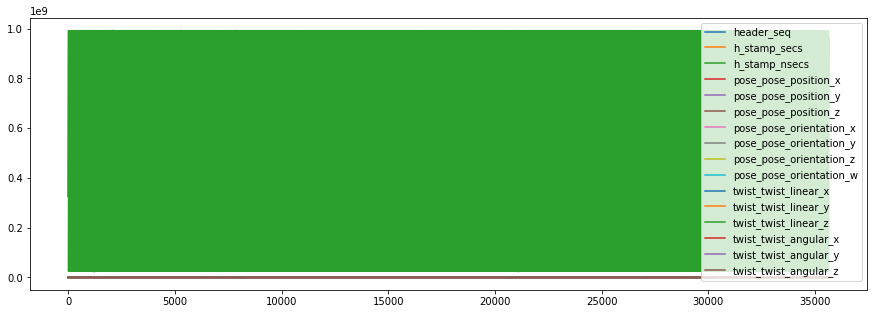

In [8]:
temp_odom.plot.line(figsize=(15,5))

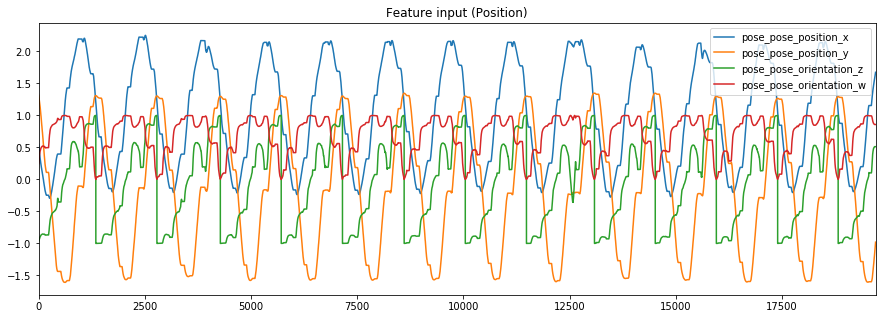

In [9]:
temp_odom.plot.line(y=cfg['feature_in'][:4], title='Feature input (Position)', figsize=(15,5))

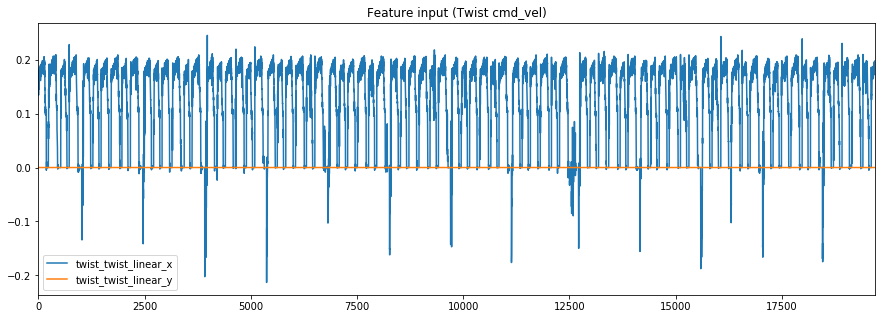

In [10]:
temp_odom.plot.line(y=cfg['feature_in'][4:6], title='Feature input (Twist cmd_vel)', figsize=(15,5))

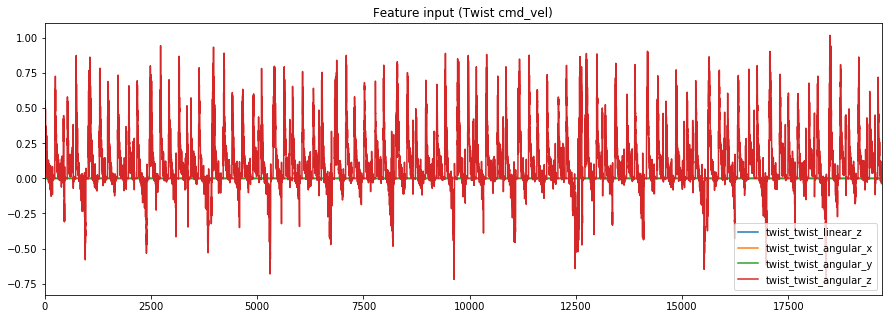

In [11]:
temp_odom.plot.line(y=cfg['feature_in'][6:10], title='Feature input (Twist cmd_vel)', figsize=(15,5))

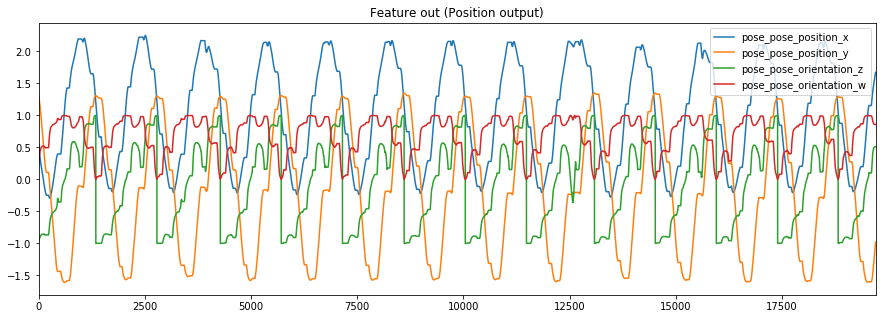

In [12]:
temp_odom.plot.line(y=cfg['feature_out'][0:4],
                    title='Feature out (Position output)', figsize=(15,5))

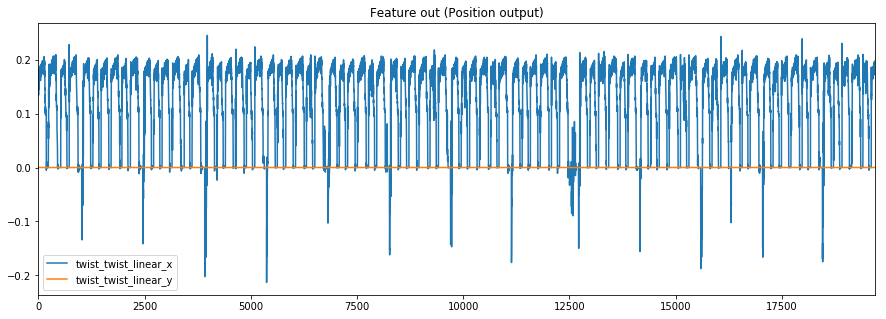

In [13]:
temp_odom.plot.line(y=cfg['feature_out'][4:6],
                    title='Feature out (Position output)', figsize=(15,5))

<AxesSubplot:title={'center':'Feature out (Position output)'}>

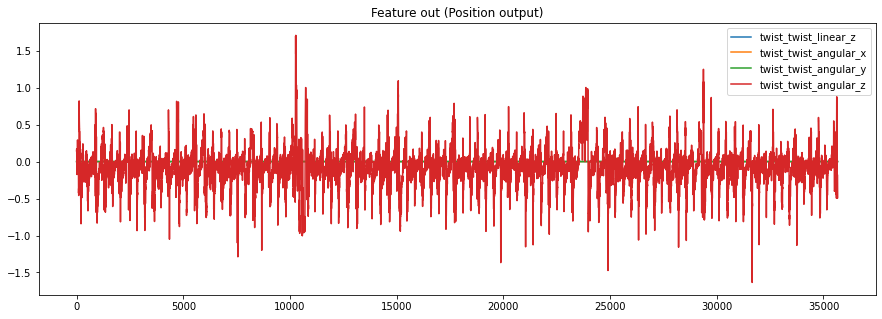

In [37]:
temp_odom.plot.line(y=cfg['feature_out'][6:10],
                    title='Feature out (Position output)', figsize=(15,5))

## Standardizing data 

In [14]:
from sklearn.preprocessing import StandardScaler
def standardize(data):
    scaler = StandardScaler()
    print("shape data={}".format(data.shape))
    print("data mean {}, data variance {}".format(np.mean(data, axis=0),np.var(data, axis=0)))
    data = scaler.fit_transform(data)
    print("shape transformed data={}".format(data.shape))
    print("Scaler Mean: {}".format(scaler.mean_))
    print("Scaler Variance: {}".format(scaler.var_))
    print("data mean {}, data variance {}".format(np.mean(data, axis=0),np.var(data, axis=0)))
    return data, scaler

In [15]:
in_dataset = temp_odom[cfg['feature_in']]
out_dataset = temp_odom[cfg['feature_out']]
print("in_dataset={}, out_dataset={}".format(in_dataset.shape, out_dataset.shape))
len_data =len(in_dataset)
origin_input_train_set = in_dataset[:int(0.7*len_data)]
origin_input_test_set = in_dataset[int(0.7*len_data):]
origin_output_train_set = out_dataset[:int(0.7*len_data)]
origin_output_test_set = out_dataset[int(0.7*len_data):]
print("origin_input_train_set={}".format(origin_input_train_set.shape))
print("origin_output_train_set={}".format(origin_output_train_set.shape))

in_dataset=(19704, 10), out_dataset=(19704, 10)
origin_input_train_set=(13792, 10)
origin_output_train_set=(13792, 10)


In [16]:
train_input_data, input_scaler = standardize(origin_input_train_set)
test_input_data = input_scaler.transform(origin_input_test_set)
train_output_data, output_scaler = standardize(origin_output_train_set)
test_output_data = output_scaler.transform(origin_output_test_set)
print("train_input_data={}".format(train_input_data.shape))
print("train_output_data={}".format(train_output_data.shape))

shape data=(13792, 10)
data mean pose_pose_position_x       1.030887
pose_pose_position_y      -0.122604
pose_pose_orientation_z   -0.086256
pose_pose_orientation_w    0.671737
twist_twist_linear_x       0.118027
twist_twist_linear_y       0.000000
twist_twist_linear_z       0.000000
twist_twist_angular_x      0.000000
twist_twist_angular_y      0.000000
twist_twist_angular_z      0.088640
dtype: float64, data variance pose_pose_position_x       0.698535
pose_pose_position_y       0.985872
pose_pose_orientation_z    0.453666
pose_pose_orientation_w    0.087663
twist_twist_linear_x       0.006790
twist_twist_linear_y       0.000000
twist_twist_linear_z       0.000000
twist_twist_angular_x      0.000000
twist_twist_angular_y      0.000000
twist_twist_angular_z      0.037604
dtype: float64
shape transformed data=(13792, 10)
Scaler Mean: [ 1.03088736 -0.12260369 -0.08625624  0.67173719  0.11802683  0.
  0.          0.          0.          0.08863987]
Scaler Variance: [0.6985351  0.98587183

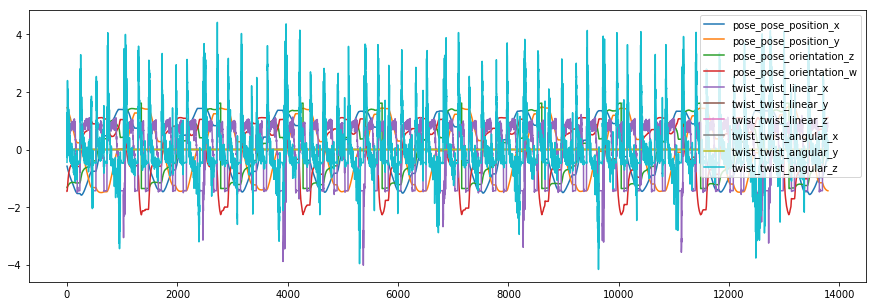

In [22]:
x = [i for i in range(len(train_input_data))]
plt.figure(figsize=(15,5))
for i,f in enumerate(cfg['feature_in']):
    plt.plot(x, train_input_data[:,i], label=f)
plt.legend()
plt.savefig("scaled_kobuki_dataset.png",
                format='png', dpi=1000, bbox_inches="tight")
plt.show()

We split the messy figure into two figures, one with position while the other with twist cmd_vel.

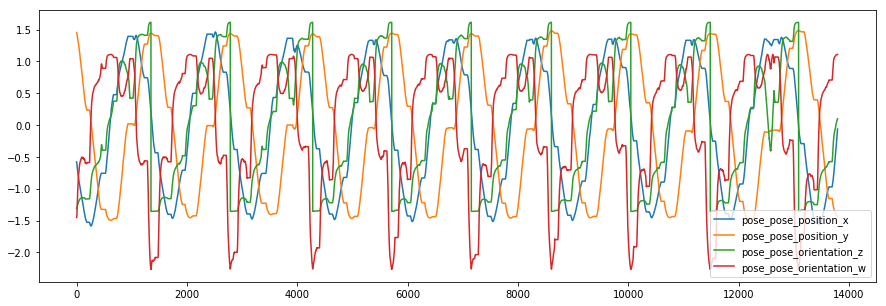

In [23]:
plt.figure(figsize=(15,5))
for i,f in enumerate(cfg['feature_in']):
    if 'pose_pose' in f:
        plt.plot(x, train_input_data[:,i], label=f)
plt.legend()
plt.savefig("scaled_kobuki_position.png",
                format='png', dpi=1000, bbox_inches="tight")
plt.show()

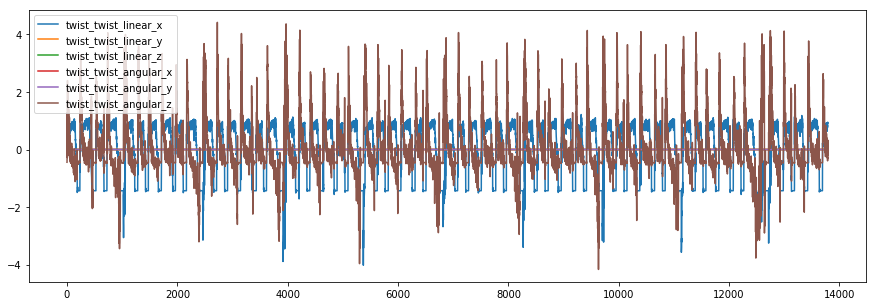

In [24]:
plt.figure(figsize=(15,5))
for i,f in enumerate(cfg['feature_in']):
    if 'twist_twist' in f:
        plt.plot(x, train_input_data[:,i], label=f)
plt.legend()
plt.savefig("scaled_kobuki_cmd_vel.png",
                format='png', dpi=1000, bbox_inches="tight")
plt.show()

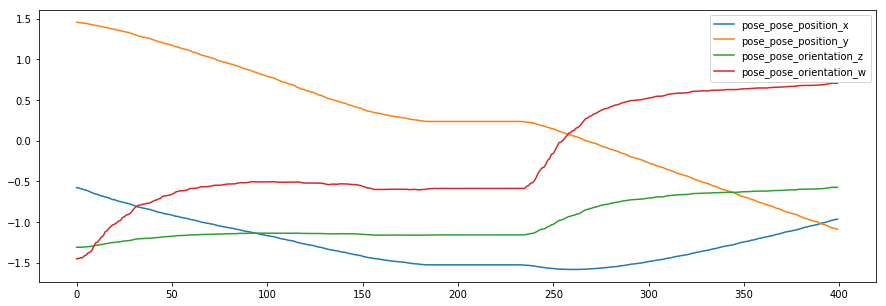

In [25]:
plot_len = 400
xx = [i for i in range(len(train_input_data[:plot_len]))]
plt.figure(figsize=(15,5))
for i,f in enumerate(cfg['feature_in']):
    if 'pose_pose' in f:
        plt.plot(xx, train_input_data[:plot_len,i], label=f)
plt.legend()
plt.show()

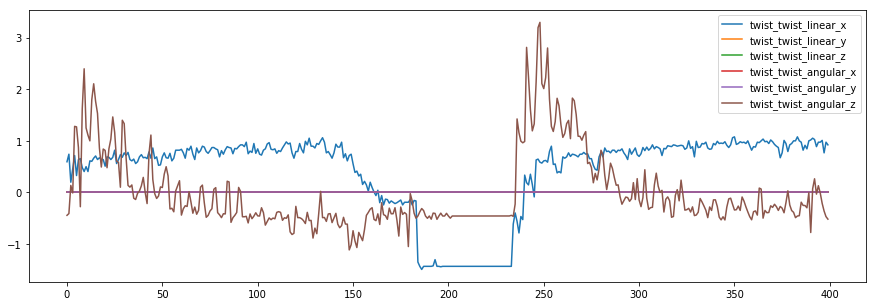

In [26]:
plt.figure(figsize=(15,5))
for i,f in enumerate(cfg['feature_in']):
    if 'twist_twist' in f:
        plt.plot(xx, train_input_data[:plot_len,i], label=f)
plt.legend()
plt.show()

## Part 1.3 Plot and verify the script of preprocessing data 
In this part, we import the functions of the pre-processing script and plot some seq input and sequence target

In [12]:
data = importlib.import_module('dataset.turtlebot3')

In [38]:
train_input, train_target = data.prepare_seq2seq_data(train_input_data,
        train_output_data, cfg['look_back'], cfg['look_ahead'], 
        cfg['step_window'])

In [39]:
print("train_input.shape={}, train_target.shape={}".format(
    train_input.shape, train_target.shape))
print("train_input[50,:30,1]={},\ntrain_target[50,:30,1]={}".format(
    train_input[50,:30,1], train_target[50,:30,1]))

train_input.shape=(1509, 120, 6), train_target.shape=(1509, 120, 4)
train_input[50,:30,1]=[1.18067996 1.18455984 1.18833606 1.19207712 1.19580308 1.19936133
 1.20280119 1.20625114 1.20956809 1.21303792 1.21689423 1.22085293
 1.22480368 1.22883718 1.23274485 1.23645957 1.24020597 1.24383382
 1.24754781 1.25145863 1.25529296 1.25917221 1.26314735 1.26693731
 1.27073875 1.27447077 1.27801201 1.28156059 1.2850049  1.28828947],
train_target[50,:30,1]=[1.23645957 1.24020597 1.24383382 1.24754781 1.25145863 1.25529296
 1.25917221 1.26314735 1.26693731 1.27073875 1.27447077 1.27801201
 1.28156059 1.2850049  1.28828947 1.29149958 1.29480582 1.29801927
 1.30127306 1.30447542 1.30743337 1.31019945 1.31292729 1.3155789
 1.31813907 1.320718   1.32320851 1.32566536 1.328197   1.33065674]


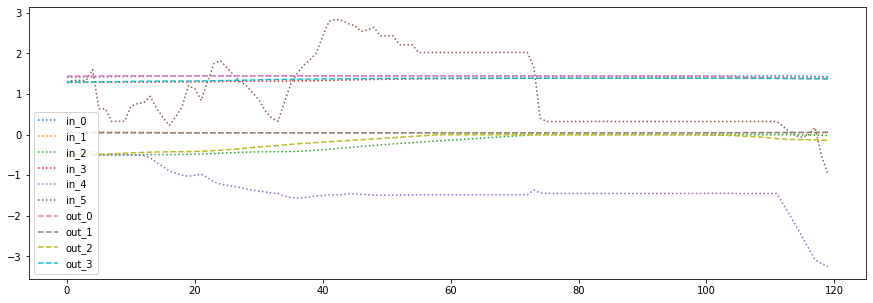

In [40]:
plt.figure(figsize=(15,5))
id = 100
plot_seqs = [train_input[id], train_target[id]]

xx = [i for i in range(cfg['look_back'])]

for i in range(len(cfg['feature_in'])):
    plt.plot(xx, train_input[id,:,i], label='in_{}'.format(i),linestyle=':')
    
for i in range(len(cfg['feature_out'])):
    plt.plot(xx, train_target[id,:,i], label='out_{}'.format(i),linestyle='--')
    
plt.legend()
plt.show()

## Part 1.2 Generate Synthesized Testset
We generate a synthesized testset which consists of some times of anomalies 
such as burst events, or peark signals adding to the normal data.

Adopt a method from Luo Tie paper: "Distributed Anomaly Detection using
Autoencoder Neural Networks in WSN for IoT". 

* **Spike**: a sharp rise followed immediately by a sharp decline in the sensor reading. Formally,
$$x'(t) = x(t) + vδ(t); $$
where $δ(t)$ is the Dirac delta function and $v$ is the magnitude of the spike.

* **Burst**: a continuous and constant offset persisting for a finite period of time. Formally,
$$x'(t) = \begin{cases}
     x(t) + v , t_\text{start} ≤ t ≤ t_\text{end}\\
        x(t), \text{otherwise}. 
     \end{cases}
$$

In both cases, $v$ can be negative.

For us, we get $v$ in between the range of sensor values for each dimension. 
We inject anomaly time $t$ at a random manner with probability p=15% of the normal dataset.

In [52]:
def generate_anomalous_spike_indices(length, prob):
    anomalous_labels = np.zeros(length)
    anomalous_indices = []
    i=0
    while i < length:                   
        if random.random() < prob:                 
            anomalous_labels[i] = 1.
            anomalous_indices.append(i)
        i+=1
    return np.array(anomalous_indices), anomalous_labels

In [94]:
def generate_anomalous_burst_indices(length, prob, burst_width):
    anomalous_labels = np.zeros(length)
    anomalous_indices = []
    i=0
    while i < length:                   
        if random.random() < prob:  
            for j in range(i, i+burst_width):
                if j >= length:
                    break
                else:                                                                  
                    anomalous_indices.append(j)
                    anomalous_labels[j] = 1.
            i += burst_width
        else:
            i += 1             
            
    return np.array(anomalous_indices), anomalous_labels

### Part 1.2.b: Generate and save the synthesized anomalous dataset as a test set
We name this test set with anomalous burst as: `test_input_anomaly_burst.npy` with probability of anomalous is 2% and each burst length is 50 samples which is half of our `look_back`. The groundtruth label is saved as `test_anomaly_burst_label.npy`

In [45]:
print(origin_input_test_set, len(cfg['feature_in']))

       pose_pose_position_x  pose_pose_position_y
22757             -1.095151              1.890439
22758             -1.093168              1.893364
22759             -1.091122              1.896361
22760             -1.089198              1.899156
22761             -1.087247              1.901958
...                     ...                   ...
32505              1.938364             -0.469622
32506              1.935965             -0.476257
32507              1.933519             -0.482971
32508              1.931022             -0.489797
32509              1.928508             -0.496615

[9753 rows x 2 columns] 2


In [63]:
#contaminate_rate
prob = 0.005
anomalous_indices, anomalous_labels = generate_anomalous_spike_indices(len(origin_input_test_set), prob)
print("anomalous_indices={}, anomalous_labels={}".format(anomalous_indices, anomalous_labels.shape))

anomalous_indices=[ 260  316  818  833 1025 1126 1220 1340 1388 1612 1860 1883 1933 2289
 2340 2358 3180 3230 3298 3451 3727 3760 4109 4187 4358 4753 5000 5177
 5243 5301 5385 5562 6292 6447 6477 6733 6829 7466 7728 7831 8018 8061
 9080 9150 9231 9347 9361 9435], anomalous_labels=(9753,)


In [78]:
synth_input_test = origin_input_test_set.copy()
synth_input_test.head()

pose_pose_position_x  pose_pose_position_y
22757             -1.095151              1.890439
22758             -1.093168              1.893364
22759             -1.091122              1.896361
22760             -1.089198              1.899156
22761             -1.087247              1.901958

In [79]:
synth_input_test.iloc[anomalous_indices]

pose_pose_position_x  pose_pose_position_y
23017              0.024199              1.875653
23073              0.423410              1.821558
23575              1.929775              0.062656
23590              1.969756              0.010310
23782              1.565578             -1.274119
23883              0.975166             -1.675547
23977              0.310626             -1.815674
24097             -0.559016             -1.828107
24145             -0.891493             -1.771488
24369             -1.361239             -1.492652
24617             -1.876999              0.185695
24640             -1.865389              0.351980
24690             -1.811523              0.706543
25046             -0.807464              1.965139
25097             -0.440171              1.925135
25115             -0.311860              1.910530
25937              1.659043             -0.024752
25987              1.764251             -0.323031
26055              1.728814             -0.812350
26208              1.086039             -1.653798
26484             -0.861879             -1.801705
26517             -1.072971             -1.783279
26866             -1.790166             -0.590848
26944             -1.900707             -0.035990
27115             -1.652854              1.157340
27510              0.010435              1.848694
27757              1.575879              1.156516
27934              1.949227              0.078004
28000              1.997697              0.026774
28058              1.954990              0.038393
28142              1.977922             -0.381454
28319              1.355923             -1.461659
29049             -1.847926             -0.388218
29204             -1.811184              0.733685
29234             -1.752047              0.940126
29490             -1.051678              1.938039
29586             -0.753055              1.966236
30223              1.943799              0.056862
30485              1.506435             -1.327599
30588              0.874684             -1.709986
30775             -0.468964             -1.848011
30818             -0.774799             -1.806045
31837             -0.131428              1.881661
31907              0.373550              1.821837
31988              0.942650              1.680525
32104              1.580433              1.169645
32118              1.627129              1.077555
32192              1.760238              0.555721

In [80]:
origin_input_test_set['pose_pose_position_x'].max()

2.02513106881

In [81]:
for col in cfg['feature_in']:
    max_x = origin_input_test_set[col].max()
    min_x = origin_input_test_set[col].min()
    spike_magnitude = random.uniform(min_x, max_x)
    for i in anomalous_indices:
        synth_input_test.iloc[i][col] += (-1)**i*spike_magnitude

<AxesSubplot:title={'center':'Origin input test set'}>

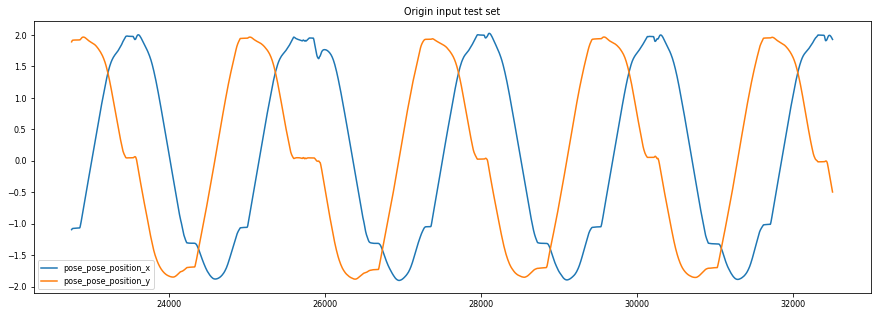

In [82]:
origin_input_test_set.plot.line(y=cfg['feature_in'], title='Origin input test set', figsize=(15,5))

<AxesSubplot:title={'center':'Synthesized input test set'}>

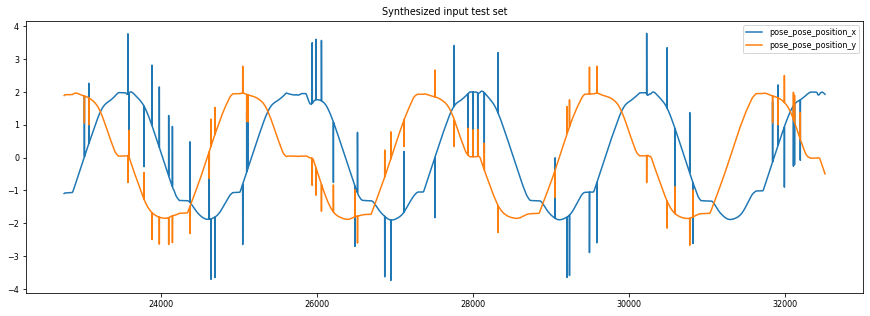

In [83]:
synth_input_test.plot.line(y=cfg['feature_in'], title='Synthesized input test set', figsize=(15,5))

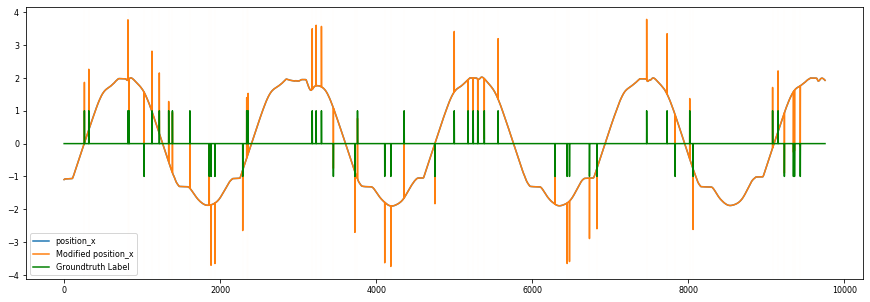

In [90]:
x = [i for i in range(len(origin_input_test_set))]
plt.figure(figsize=(15,5))
plt.plot(x, origin_input_test_set.values[:,0], label='position_x')
plt.plot(x, synth_input_test.values[:,0], label='Modified position_x')
for column in anomalous_indices:
    plt.axvline(x=column, color=sns.xkcd_rgb["peach"],alpha=.01)
plt.plot(x, anomalous_labels*np.sign(synth_input_test.values[:,0]), color='g', label='Groundtruth Label')
plt.legend()
plt.show()

#### Part 1.2.b.2 Burst anomaly generation

In [112]:
synth_burst_input_test = origin_input_test_set.copy()
synth_burst_input_test.head()

pose_pose_position_x  pose_pose_position_y
22757             -1.095151              1.890439
22758             -1.093168              1.893364
22759             -1.091122              1.896361
22760             -1.089198              1.899156
22761             -1.087247              1.901958

In [113]:
generate_anomalous_burst_indices
#contaminate_rate
prob = 0.005
burst_width = 20
anomalous_indices_burst, anomalous_labels_burst = generate_anomalous_burst_indices(len(origin_input_test_set),
                                                                                   prob, burst_width)
print("anomalous_indices={}, anomalous_labels={}".format(anomalous_indices_burst.shape, 
                                                         anomalous_labels_burst.shape))

anomalous_indices=(920,), anomalous_labels=(9753,)


In [114]:
for col in cfg['feature_in']:
    max_x = origin_input_test_set[col].max()
    min_x = origin_input_test_set[col].min()
    spike_magnitude = random.uniform(min_x, max_x)
    for i in anomalous_indices_burst:
        synth_burst_input_test.iloc[i][col] += (-1)**i*spike_magnitude

<AxesSubplot:title={'center':'Synthesized Burst input test set'}>

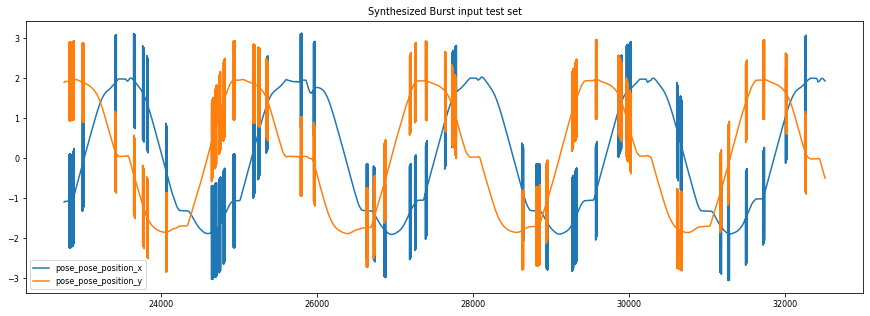

In [115]:
synth_burst_input_test.plot.line(y=cfg['feature_in'], title='Synthesized Burst input test set', figsize=(15,5))

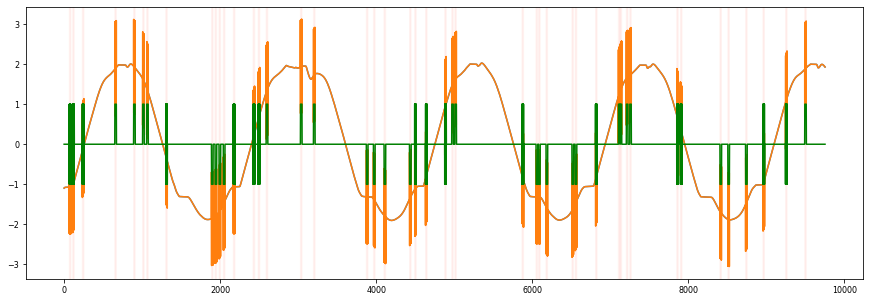

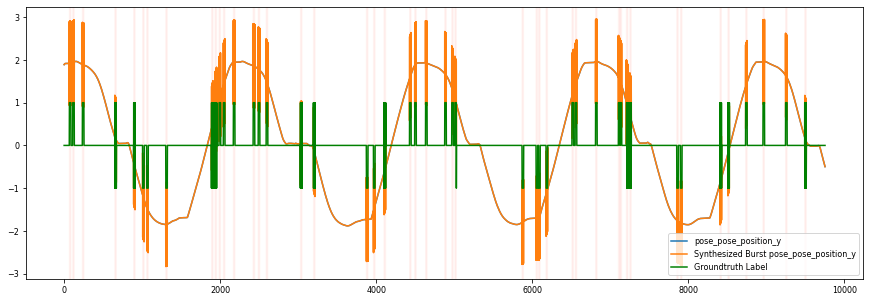

In [116]:
x = [i for i in range(len(origin_input_test_set))]
for i,feat in enumerate(cfg['feature_in']):
    plt.figure(figsize=(15,5))
    plt.plot(x, origin_input_test_set.values[:,i], label=feat)
    plt.plot(x, synth_burst_input_test.values[:,i], label='Synthesized Burst {}'.format(feat))
    for column in anomalous_indices_burst:
        plt.axvline(x=column, color=sns.xkcd_rgb["peach"],alpha=.01)
    plt.plot(x, anomalous_labels_burst*np.sign(synth_burst_input_test.values[:,i]),
             color='g', label='Groundtruth Label')


plt.legend()
plt.show()

# Part 2: Other csv files


In [16]:
temp_cmd_vel = pd.read_csv('../dataset/turtlebot3/normal/cmd_vel.csv')

<AxesSubplot:>

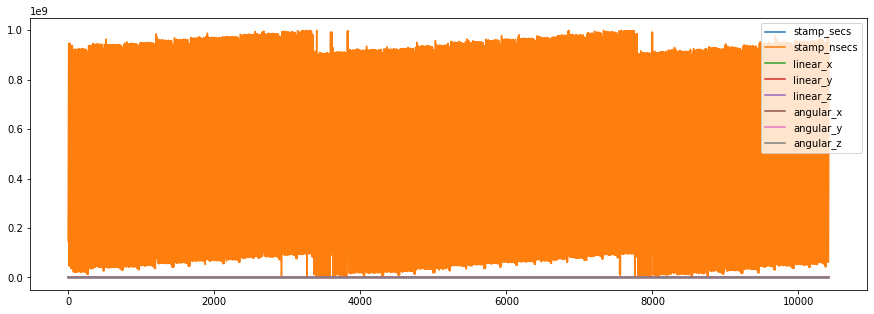

In [19]:
temp_cmd_vel.plot.line( figsize=(15,5))

<AxesSubplot:title={'center':'cmd_vel linear'}>

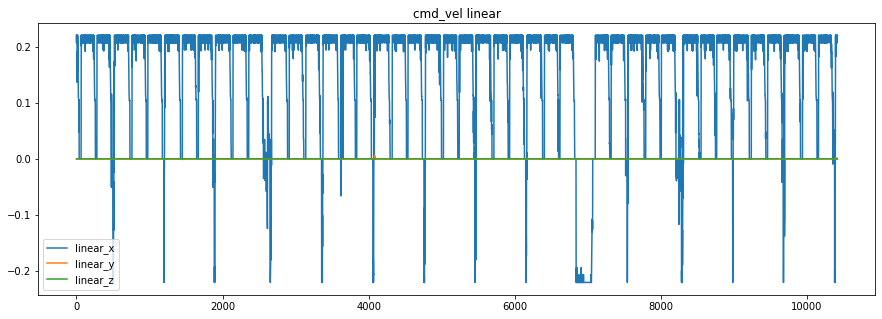

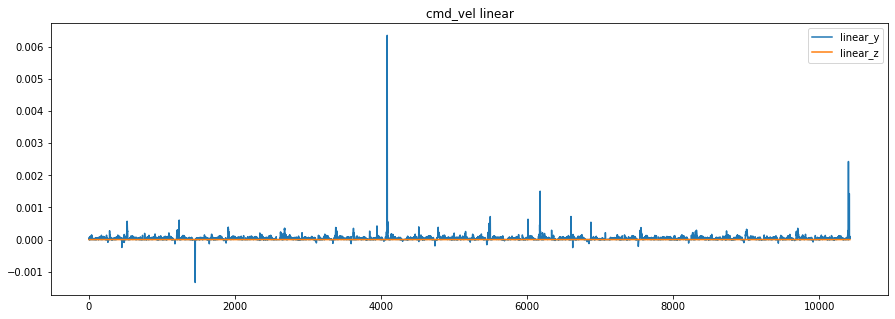

In [21]:
temp_cmd_vel.plot.line(y=['linear_x', 'linear_y', 'linear_z'], title='cmd_vel linear', figsize=(15,5))
temp_cmd_vel.plot.line(y=['linear_y', 'linear_z'], title='cmd_vel linear', figsize=(15,5))

<AxesSubplot:title={'center':'cmd_vel angular'}>

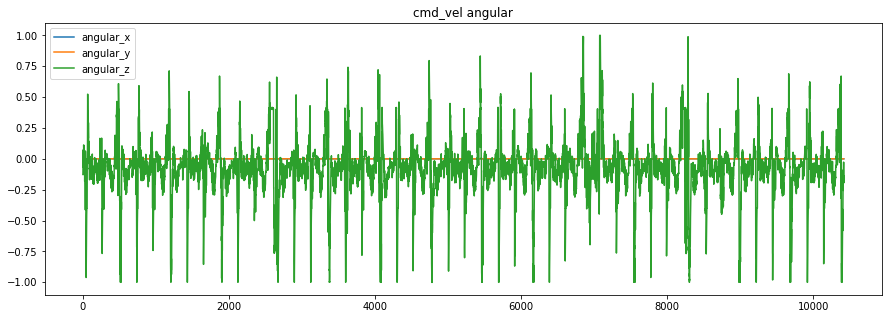

In [20]:
temp_cmd_vel.plot.line(y=['angular_x', 'angular_y', 'angular_z'], title='cmd_vel angular', figsize=(15,5))

<AxesSubplot:title={'center':'cmd_vel angular'}>

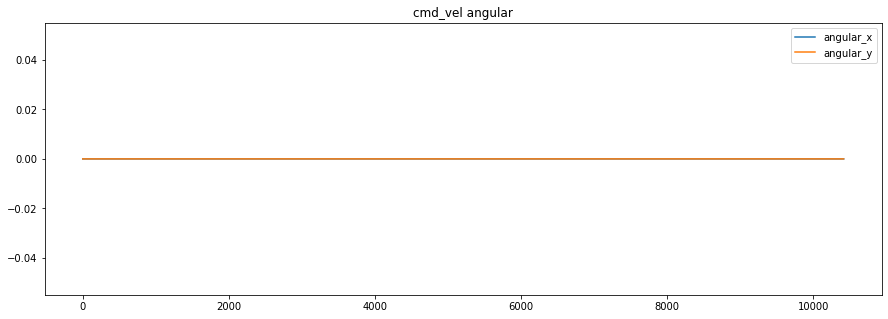

In [22]:
temp_cmd_vel.plot.line(y=['angular_x', 'angular_y'], title='cmd_vel angular', figsize=(15,5))

In [23]:
temp_imu = pd.read_csv('../dataset/turtlebot3/normal/imu.csv')

In [24]:
temp_imu.head()

header_seq  h_stamp_secs  h_stamp_nsecs  orientation_x  orientation_y  \
0        4702         13357       51000000      -0.003847       0.000257   
1        4703         13357       56000000      -0.003847       0.000258   
2        4704         13357       61000000      -0.003846       0.000257   
3        4705         13357       66000000      -0.003847       0.000256   
4        4706         13357       71000000      -0.003847       0.000258   

   orientation_z  angular_x  angular_y  angular_z  linear_accel_x  \
0       0.997611   0.000478  -0.000151  -0.085955        0.006456   
1       0.997596   0.000495  -0.000164  -0.085857       -0.004989   
2       0.997582  -0.002417  -0.002698  -0.080353        0.086822   
3       0.997570   0.001385   0.001101  -0.055383        0.322304   
4       0.997564   0.000180  -0.001012  -0.026329        0.371627   

   linear_accel_y  linear_accel_z  
0        0.000818        0.000048  
1       -0.013452       -0.000028  
2       -0.044960       -0.011685  
3       -0.104603        0.008199  
4       -0.119521        0.020066

<AxesSubplot:title={'center':'orientation'}>

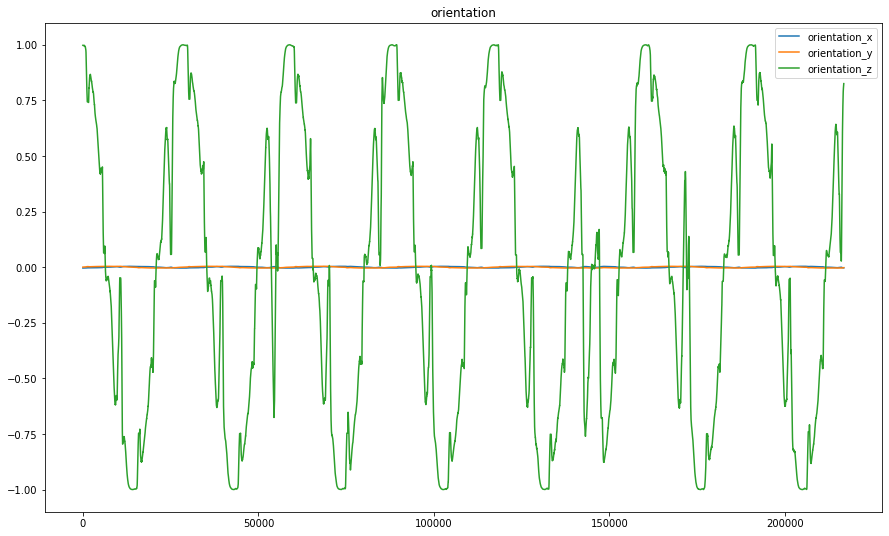

In [25]:
temp_imu.plot.line(y=['orientation_x', 'orientation_y', 'orientation_z'], title='orientation', figsize=(15,9))

<AxesSubplot:title={'center':'angular'}>

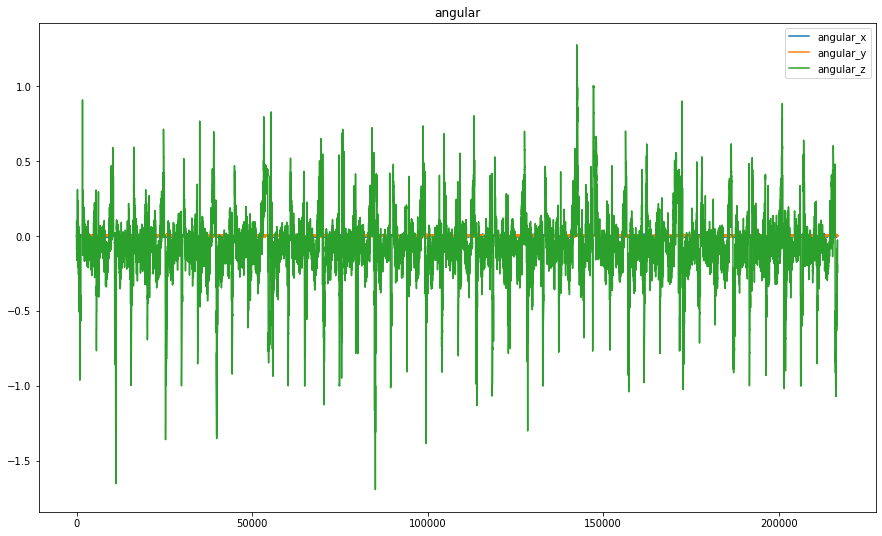

In [26]:
temp_imu.plot.line(y=['angular_x', 'angular_y', 'angular_z'], title='angular', figsize=(15,9))

<AxesSubplot:title={'center':'angular'}>

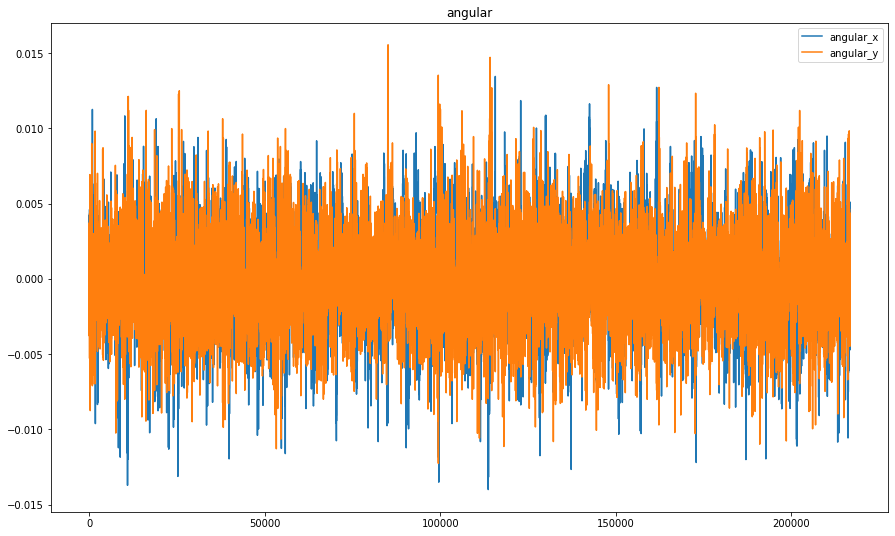

In [27]:
temp_imu.plot.line(y=['angular_x', 'angular_y'], title='angular', figsize=(15,9))

<AxesSubplot:title={'center':'linear_accel'}>

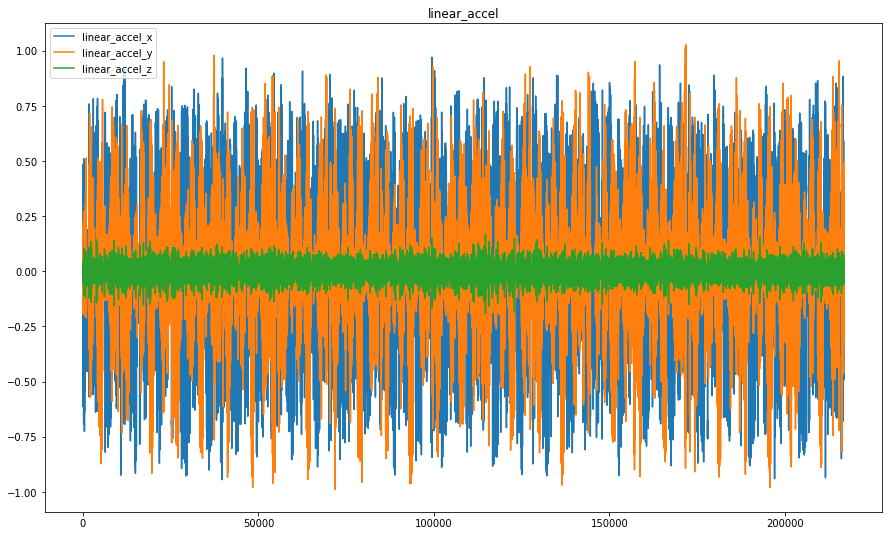

In [28]:
temp_imu.plot.line(y=['linear_accel_x', 'linear_accel_y', 'linear_accel_z'], title='linear_accel', figsize=(15,9))

# Part 3: Attack Datasets

In [54]:
attack_dir = '../dataset/kobuki/attack_pentagon'
attack_odom = pd.read_csv('{}/odometry.csv'.format(attack_dir))

In [53]:
print(attack_odom.shape)
attack_odom.head()

(8426, 16)


header_seq  h_stamp_secs  h_stamp_nsecs  pose_pose_position_x  \
0        1224    1610013058      258955359             -0.239991   
1        1225    1610013058      316970373             -0.242290   
2        1226    1610013058      339049074             -0.243848   
3        1227    1610013058      397063412             -0.247708   
4        1228    1610013058      420105804             -0.248592   

   pose_pose_position_y  pose_pose_position_z  pose_pose_orientation_x  \
0              0.113047                   0.0                      0.0   
1              0.109974                   0.0                      0.0   
2              0.107891                   0.0                      0.0   
3              0.102736                   0.0                      0.0   
4              0.101534                   0.0                      0.0   

   pose_pose_orientation_y  pose_pose_orientation_z  pose_pose_orientation_w  \
0                      0.0                -0.894154                 0.447759   
1                      0.0                -0.894193                 0.447681   
2                      0.0                -0.894232                 0.447603   
3                      0.0                -0.892271                 0.451501   
4                      0.0                -0.890689                 0.454612   

   twist_twist_linear_x  twist_twist_linear_y  twist_twist_linear_z  \
0              0.000000                   0.0                   0.0   
1              0.063969                   0.0                   0.0   
2              0.130070                   0.0                   0.0   
3              0.107326                   0.0                   0.0   
4              0.074631                   0.0                   0.0   

   twist_twist_angular_x  twist_twist_angular_y  twist_twist_angular_z  
0                    0.0                    0.0              -0.002094  
1                    0.0                    0.0              -0.001571  
2                    0.0                    0.0              -0.003840  
3                    0.0                    0.0               0.311890  
4                    0.0                    0.0               0.201586

In [55]:
hack_cmd = pd.read_csv('{}/hack_cmd.csv'.format(attack_dir))
print(hack_cmd.shape)
hack_cmd.head()

(5517, 8)


stamp_secs  stamp_nsecs  linear_x  linear_y  linear_z  angular_x  \
0  1610013058    318399906       0.0       0.0       0.0        0.0   
1  1610013058    418617010       0.0       0.0       0.0        0.0   
2  1610013058    519315958       0.0       0.0       0.0        0.0   
3  1610013058    619672060       0.0       0.0       0.0        0.0   
4  1610013058    720108032       0.0       0.0       0.0        0.0   

   angular_y  angular_z  
0        0.0        0.0  
1        0.0        0.0  
2        0.0        0.0  
3        0.0        0.0  
4        0.0        0.0

In [31]:
hack_cmd['stamp_secs'].value_counts()

1610013303    33
1610013372    33
1610013382    33
1610013302    33
1610013298    33
1610013312    33
1610013309    33
1610013313    33
1610013240    33
1610013145    33
1610013228    33
1610013243    33
1610013176    33
1610013144    33
1610013140    33
1610013307    33
1610013315    33
1610013112    33
1610013109    33
1610013143    33
1610013141    33
1610013103    33
1610013380    33
1610013102    33
1610013111    33
1610013106    33
1610013110    33
1610013139    32
1610013378    32
1610013314    32
              ..
1610013209    10
1610013432    10
1610013217    10
1610013428    10
1610013221    10
1610013352    10
1610013444     9
1610013420     9
1610013135     9
1610013334     9
1610013155     9
1610013346     9
1610013178     9
1610013201     9
1610013213     9
1610013126     9
1610013253     9
1610013321     9
1610013292     9
1610013401     9
1610013433     9
1610013359     9
1610013457     9
1610013092     9
1610013168     9
1610013248     9
1610013280     9
1610013266    

In [42]:
attack_odom['h_stamp_secs'].value_counts()

1610013164    24
1610013159    23
1610013342    23
1610013449    23
1610013211    23
1610013346    23
1610013173    23
1610013152    23
1610013076    23
1610013175    23
1610013082    23
1610013336    23
1610013135    23
1610013396    23
1610013234    23
1610013376    23
1610013273    22
1610013386    22
1610013101    22
1610013109    22
1610013394    22
1610013354    22
1610013261    22
1610013192    22
1610013200    22
1610013409    22
1610013253    22
1610013245    22
1610013237    22
1610013221    22
              ..
1610013063    20
1610013238    20
1610013255    19
1610013288    19
1610013075    19
1610013260    19
1610013123    19
1610013103    19
1610013060    19
1610013216    19
1610013382    19
1610013213    19
1610013193    19
1610013201    19
1610013373    19
1610013134    19
1610013353    19
1610013435    19
1610013078    19
1610013446    19
1610013411    19
1610013395    19
1610013441    19
1610013457    19
1610013266    19
1610013120    18
1610013174    18
1610013355    

* **How to anotate anomalous label?**
We observe that `attack_odom` get data with frequency of 30 packets/s, while `hack_cmd` frequency is vary because of user input frequency. But all of them are aligned by the absolute value of `stamp_secs`. Therefore, we label the `attack_odom` based on `hack_cmd` align with `stamp_secs`. Specifically, we examine if a second of `hack_cmd` that has more than half of commands are anomalous, then we assign this second as anomalous. Then mapping to the attack_odom data with the same `stamp_secs` as anomalous data.

Define an attack label as one of the value of `hack_cmd` is not equal to zero.

If we need strictly synchronized label with `stamp_secs`, we need to synchronize `attack_odom.h_stamp_sec` and `hack_cmd.stamp_secs`.
We observe that both dataframes have the same number of `stamp_secs`.

In [56]:
def anotation(row):
    if (row['linear_x']==0 and row['linear_y']==0 and row['linear_z']==0
        and row['angular_x']==0 and row['angular_y']==0 and row['angular_z']==0):
        return 0
    else:
        return 1
hack_cmd['label'] = hack_cmd.apply(anotation, axis=1)
hack_cmd.head()                          

stamp_secs  stamp_nsecs  linear_x  linear_y  linear_z  angular_x  \
0  1610013058    318399906       0.0       0.0       0.0        0.0   
1  1610013058    418617010       0.0       0.0       0.0        0.0   
2  1610013058    519315958       0.0       0.0       0.0        0.0   
3  1610013058    619672060       0.0       0.0       0.0        0.0   
4  1610013058    720108032       0.0       0.0       0.0        0.0   

   angular_y  angular_z  label  
0        0.0        0.0      0  
1        0.0        0.0      0  
2        0.0        0.0      0  
3        0.0        0.0      0  
4        0.0        0.0      0

In [57]:
hack_cmd[hack_cmd['label']==1].head()

stamp_secs  stamp_nsecs  linear_x  linear_y  linear_z  angular_x  \
46  1610013062    855765104       0.0       0.0       0.0        0.0   
47  1610013062    956322908       0.0       0.0       0.0        0.0   
48  1610013063     56704998       0.0       0.0       0.0        0.0   
49  1610013063    102978944       0.0       0.0       0.0        0.0   
50  1610013063    202838897       0.0       0.0       0.0        0.0   

    angular_y  angular_z  label  
46        0.0       0.05      1  
47        0.0       0.10      1  
48        0.0       0.10      1  
49        0.0       0.15      1  
50        0.0       0.20      1

In [58]:
# create a second-based labels:
min_stamp = hack_cmd['stamp_secs'].min()
max_stamp = hack_cmd['stamp_secs'].max()
print(min_stamp, max_stamp)

1610013058 1610013458


In [59]:
hack_labels = {}
for i in range(min_stamp, max_stamp + 1):
    temp = hack_cmd.loc[hack_cmd['stamp_secs']==i]['label'].values
    hack_labels[i] = 1 if sum(temp)/len(temp) >= 0.5 else 0
print(hack_labels)

{1610013058: 0, 1610013059: 0, 1610013060: 0, 1610013061: 0, 1610013062: 0, 1610013063: 1, 1610013064: 1, 1610013065: 1, 1610013066: 1, 1610013067: 1, 1610013068: 1, 1610013069: 1, 1610013070: 0, 1610013071: 1, 1610013072: 1, 1610013073: 1, 1610013074: 0, 1610013075: 1, 1610013076: 1, 1610013077: 1, 1610013078: 1, 1610013079: 1, 1610013080: 1, 1610013081: 1, 1610013082: 1, 1610013083: 1, 1610013084: 1, 1610013085: 1, 1610013086: 0, 1610013087: 0, 1610013088: 0, 1610013089: 0, 1610013090: 0, 1610013091: 0, 1610013092: 0, 1610013093: 0, 1610013094: 0, 1610013095: 0, 1610013096: 0, 1610013097: 1, 1610013098: 1, 1610013099: 1, 1610013100: 1, 1610013101: 0, 1610013102: 0, 1610013103: 0, 1610013104: 0, 1610013105: 1, 1610013106: 1, 1610013107: 1, 1610013108: 1, 1610013109: 1, 1610013110: 1, 1610013111: 1, 1610013112: 1, 1610013113: 1, 1610013114: 1, 1610013115: 0, 1610013116: 0, 1610013117: 0, 1610013118: 0, 1610013119: 0, 1610013120: 0, 1610013121: 0, 1610013122: 0, 1610013123: 0, 161001312

In [79]:
def map_label(row, labels):
    hack_sec = row['h_stamp_secs']    
    return labels[hack_sec] if (hack_sec in labels) else 0
    
attack_odom['label'] = attack_odom.apply(map_label, args=(labels,), axis=1)

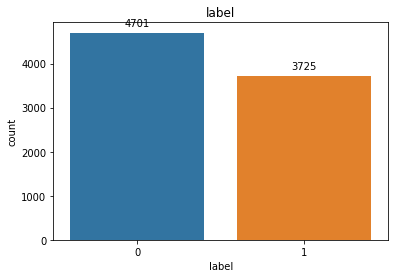

In [80]:
g = sns.countplot(data=attack_odom, x="label")
plt.title("label")
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

## Plot attack data

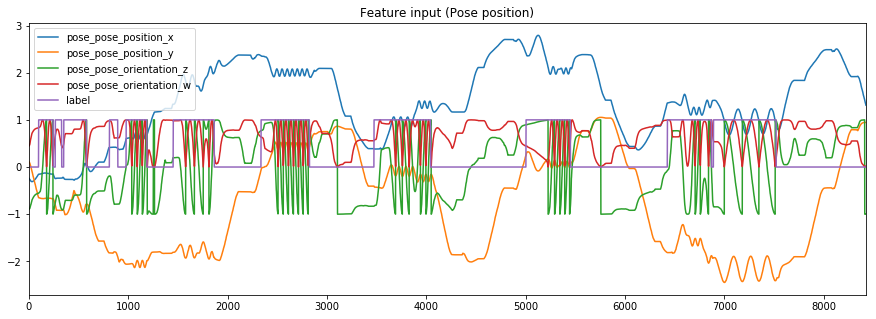

In [75]:
attack_odom.plot.line(y=cfg['feature_in'][:4]+['label'],
                      title='Feature input (Pose position)', figsize=(15,5))

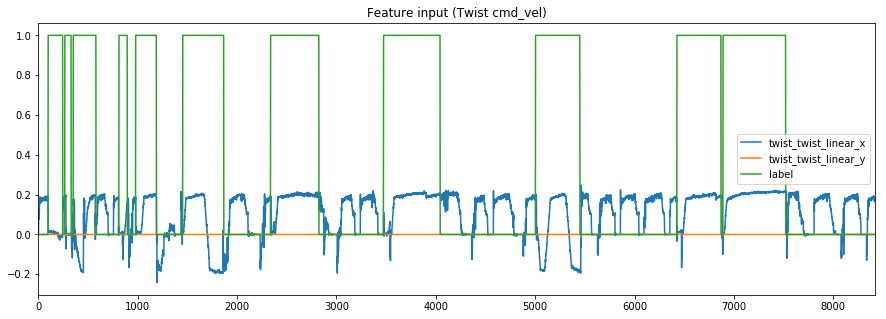

In [76]:
attack_odom.plot.line(y=cfg['feature_in'][4:6]+['label'],
                      title='Feature input (Twist cmd_vel)', figsize=(15,5))

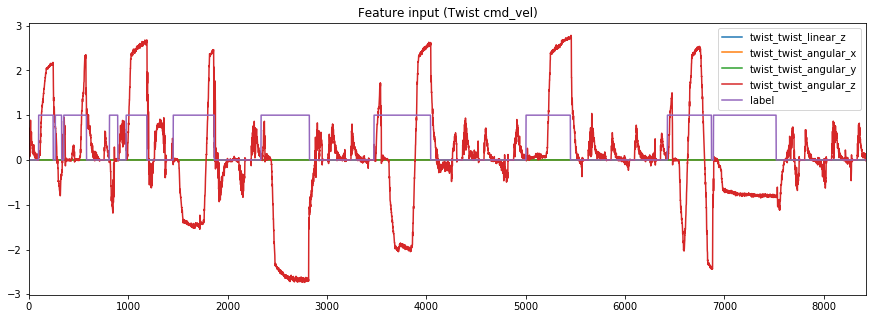

In [77]:
attack_odom.plot.line(y=cfg['feature_in'][6:10]+['label'], 
                      title='Feature input (Twist cmd_vel)', figsize=(15,5))